In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)= fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

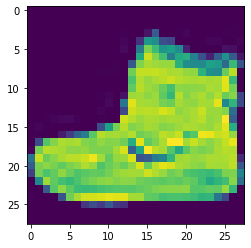

In [5]:
#visualizing the image
plt.imshow(x_train[0])

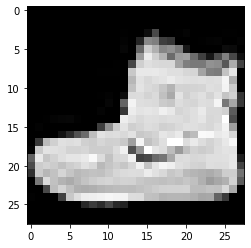

In [6]:
#visualizing the image
plt.imshow(x_train[0], cmap="gray")

### Find the number of classes 

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### Find the dimensions of each image

In [8]:
np.shape(x_train)

(60000, 28, 28)

### Display one image from each class

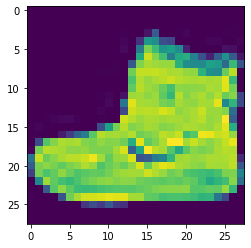

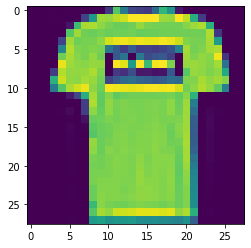

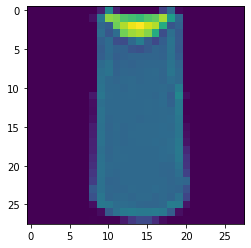

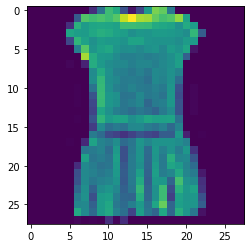

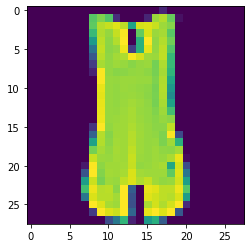

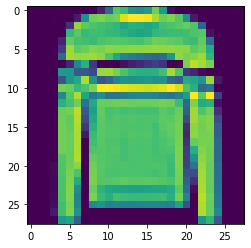

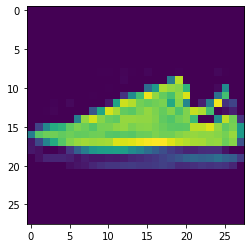

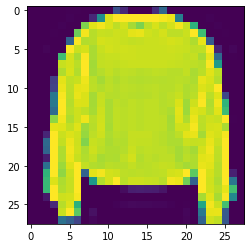

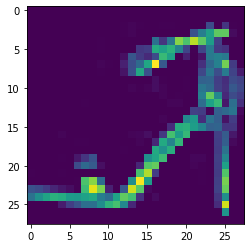

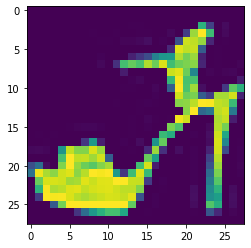

In [9]:
for i in np.unique(y_train):
     plt.imshow(x_train[i])
     plt.show()

### Perform Normalization

In [10]:
np.min(x_train[0])

0

In [11]:
np.max(x_train[0])

255

In [12]:
x_train_full=x_train/255.0
x_test_full=x_test/255.0

### Build two neural network with 2 hidden layers and 5 hidden layers

##### Neural Network with 2 hidden layers 

In [13]:
model=tf.keras.Sequential()
 
model.add(tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer")) 
model.add(tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"))  
model.add(tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"))
model.add(tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
batch_size=32
epochs=14

history = model.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/14
1688/1688 [==============================] - 8s 3ms/step - loss: 2.2139 - accuracy: 0.7331 - val_loss: 0.6042 - val_accuracy: 0.7828
Epoch 2/14
1688/1688 [==============================] - 5s 3ms/step - loss: 0.5681 - accuracy: 0.8038 - val_loss: 0.6667 - val_accuracy: 0.8042
Epoch 3/14
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4925 - accuracy: 0.8277 - val_loss: 0.4830 - val_accuracy: 0.8275
Epoch 4/14
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4460 - accuracy: 0.8429 - val_loss: 0.4368 - val_accuracy: 0.8530
Epoch 5/14
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4269 - accuracy: 0.8493 - val_loss: 0.5641 - val_accuracy: 0.8147
Epoch 6/14
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4032 - accuracy: 0.8579 - val_loss: 0.4523 - val_accuracy: 0.8457
Epoch 7/14
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3921 - accuracy: 0.8609 - val_loss: 0.4541 - val_accuracy:

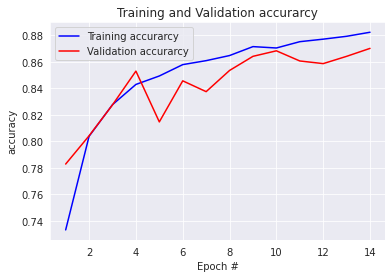

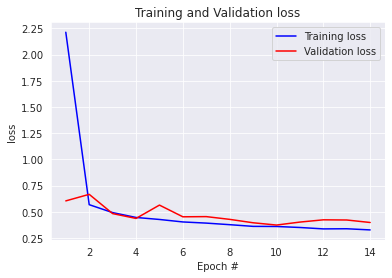

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
#get the details form the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()


plt.show()


In [29]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4339 - accuracy: 0.8618


[0.4339362382888794, 0.8618000149726868]

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred1 = model.predict(x_test, len(y_test)//32)

In [19]:
import numpy as np
y_pred1 = np.argmax(Y_pred1, axis=1)

In [20]:
print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred1)
print(cm)


Confusion Matrix
[[776   1  10  27   3   1 176   0   6   0]
 [  3 954   1  30   4   0   7   0   1   0]
 [ 20   0 659   9 235   0  71   2   4   0]
 [ 18   4   9 848  67   0  45   1   8   0]
 [  1   0  39  17 888   0  51   0   4   0]
 [  0   0   0   0   0 956   0  27   2  15]
 [110   0  70  20 121   0 667   0  12   0]
 [  0   0   0   0   0  25   0 963   0  12]
 [ 17   0   6   4   6   4   0   2 961   0]
 [  1   0   0   1   0  13   0  39   0 946]]


### Neural Network with 5 hidden layer

In [21]:
model2=tf.keras.Sequential()
 
model2.add(tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"))
model2.add(tf.keras.layers.Dense(800, activation="relu", name="hiddenLayer1"))  
model2.add(tf.keras.layers.Dense(400, activation="relu", name="hiddenLayer2"))
model2.add(tf.keras.layers.Dense(200, activation="relu", name="hiddenLayer3")) 
model2.add(tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer4"))
model2.add(tf.keras.layers.Dense(50, activation="relu", name="hiddenLayer5"))
model2.add(tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"))

In [22]:
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 800)               628000    
                                                                 
 hiddenLayer2 (Dense)        (None, 400)               320400    
                                                                 
 hiddenLayer3 (Dense)        (None, 200)               80200     
                                                                 
 hiddenLayer4 (Dense)        (None, 100)               20100     
                                                                 
 hiddenLayer5 (Dense)        (None, 50)                5050      
                                                                 
 outputLayer (Dense)         (None, 10)               

In [30]:
batch_size=32
epochs=14

history2 = model2.fit(x_train,y_train,batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/14
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2802 - accuracy: 0.8986 - val_loss: 0.3736 - val_accuracy: 0.8800
Epoch 2/14
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2768 - accuracy: 0.8991 - val_loss: 0.3671 - val_accuracy: 0.8790
Epoch 3/14
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2802 - accuracy: 0.9012 - val_loss: 0.3713 - val_accuracy: 0.8867
Epoch 4/14
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2717 - accuracy: 0.9019 - val_loss: 0.3592 - val_accuracy: 0.8848
Epoch 5/14
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2645 - accuracy: 0.9059 - val_loss: 0.3876 - val_accuracy: 0.8837
Epoch 6/14
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2619 - accuracy: 0.9055 - val_loss: 0.3877 - val_accuracy: 0.8755
Epoch 7/14
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2587 - accuracy: 0.9073 - val_loss: 0.4645 - val_accuracy:

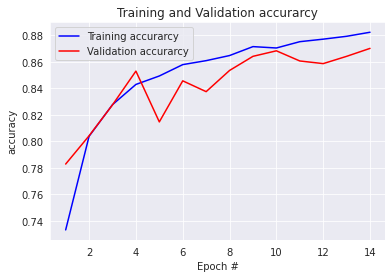

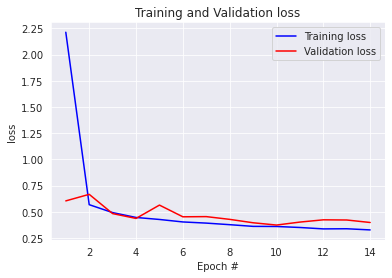

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.xlabel('Epoch #')
plt.ylabel('accuracy')
plt.title('Training and Validation accurarcy')
plt.legend()


plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()


plt.show()


In [32]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4325 - accuracy: 0.8677


[0.43250781297683716, 0.8676999807357788]

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred2 = model2.predict(x_test_full, len(y_test)//32)

In [34]:
import numpy as np
y_pred2 = np.argmax(Y_pred2, axis=1)

In [35]:
cm = confusion_matrix(y_test, y_pred2)
print(cm)


[[   0    0    0   18    0    0  982    0    0    0]
 [   0    0    0  967    0    0   33    0    0    0]
 [   0    0    0    8    0    0  992    0    0    0]
 [   0    0    0  878    0    0  122    0    0    0]
 [   0    0    0   82    0    0  918    0    0    0]
 [   0    0    0  121    0  685  194    0    0    0]
 [   0    0    0   17    0    0  983    0    0    0]
 [   0    0    0    0    0    0 1000    0    0    0]
 [   0    0    0    2    0    0  997    0    1    0]
 [   0    0    0  233    0    3  764    0    0    0]]


### Inference by comparing the 2 neural network

Neural ntwork with 2 hidden layer: Accuracy=86.18%

Neural Network with 5 hidden layer: Accuracy=87.22%

Hence, model 2 gives more accurate results.Results will vary with varying hyperparameters.